# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Визуализация и первичный анализ данных </center>

## Настройки рабочего окружения

In [1]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# Задания:

## Часть 1.

<b> Разберите и воспроизведите вычисления с семинара (файл `Visual_python.ipynb`) </b>

## Часть 2.  

#### Для набора данных о продажах и оценках видеоигр (см. семинар) выполните следующие задания: 

### Задание 0.   
Загрузите данные и выполните необходимую предобработку (удаление пропусков, преобразование признаков и т.п.)

In [2]:
# Загрузка датасета
df = pd.read_csv("data/video_games_sales.csv")
# Удалим строки, содержащие пропуски
df = df.dropna()
# Преобразование типов
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


### Задание 1.  
Постройте график или несколько, показывающий число игр, выпущенных в каждый год в общем и с разбивкой:
    - по жанру
    - по возрастному рейтингу  

   Выполните задание сначала используя `lineplot`, потом используя `barplot`.

**Tip:** На семинаре, при визуализации динамики продаж по годам с разбивкой по регионам, каждый регион был представлен отдельным столбцом (`NA_Sales`, `EU_Sales` etc.). В данном случае и жанр, и возрастной рейтинг представлены одним категориальным признаком каждый. Чтобы построить график с разбивкой, например, по жанру, необходимо перейти к датафрейму, в котором строками будут являться года (уникальные значения признака `Year_of_Release`], а столбцами - жанры (уникальные значения признака `Genre`). В ячейках этой таблицы должно быть число игр (наблюдений в оригинальном датасете), выпущенных в конкретном году в конкретном жанре. Для создания такой таблицы можно использовать, например, функцию [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) - пример использования есть в материалах первого семинара. 

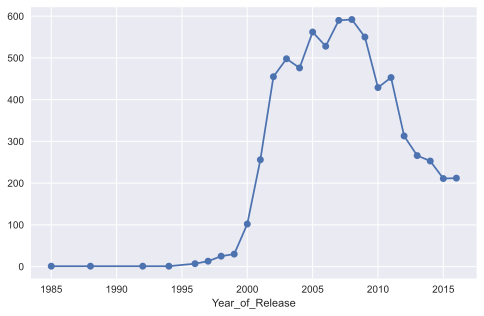

In [3]:
# Число игр, выпущенных в каждый год в общем
df.groupby(["Year_of_Release"]).Name.count().plot(marker='o')
plt.show()

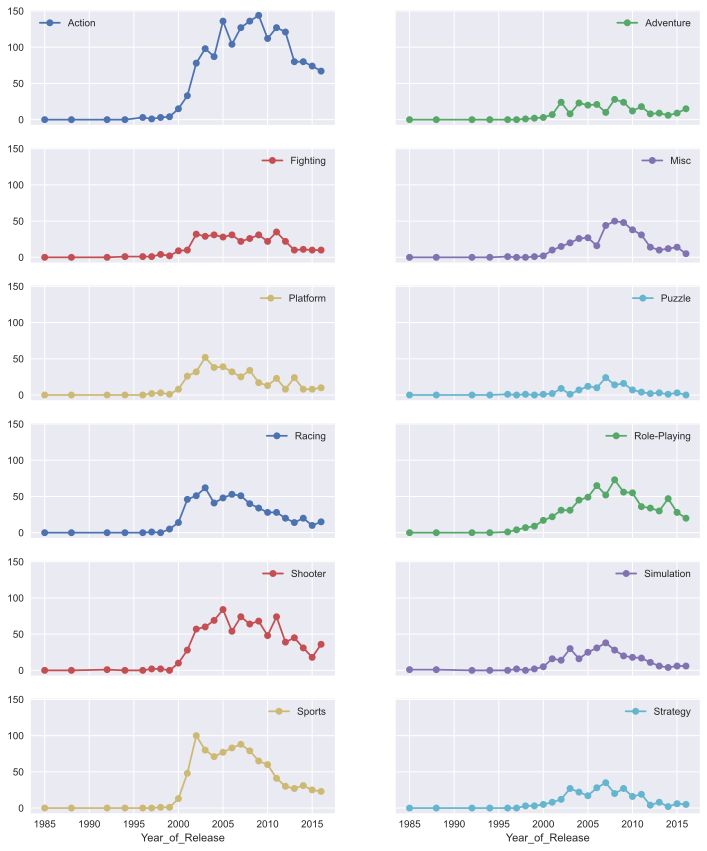

In [4]:
# Число игр, выпущенных в каждый год с разбивкой по жанру
pd.crosstab(df["Year_of_Release"], df["Genre"]).plot(subplots=True, 
                                                     sharex=True,
                                                     sharey=True,
                                                     layout=(12, 2),
                                                     figsize=(12, 30),
                                                     marker='o')
plt.show()

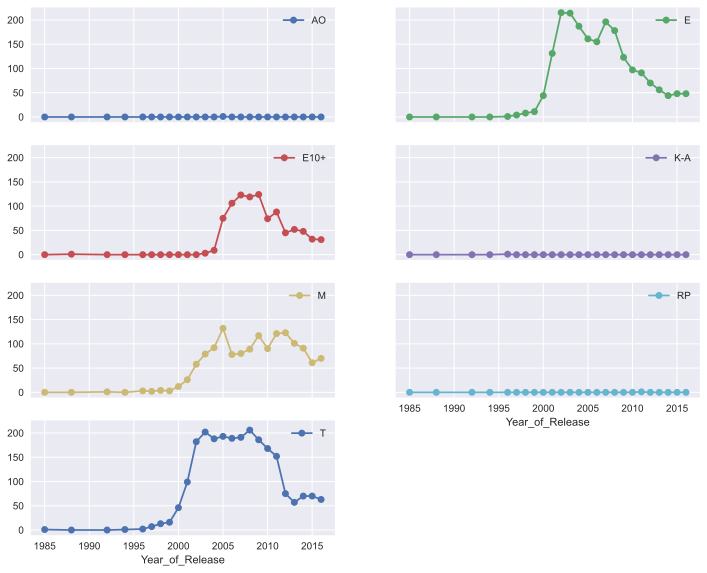

In [5]:
# Число игр, выпущенных в каждый год с разбивкой по рейтингу
pd.crosstab(df["Year_of_Release"], df["Rating"]).plot(subplots=True, 
                                                      sharex=True,
                                                      sharey=True,
                                                      layout=(12, 2),
                                                      figsize=(12, 30),
                                                      marker='o')
plt.show()

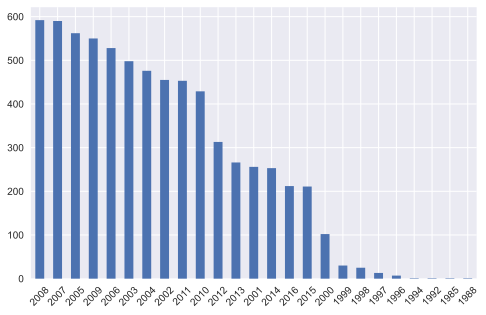

In [6]:
# Число игр, выпущенных в каждый год в общем

# NOT SORTED VERSION:
#df.groupby(["Year_of_Release"]).Name.count().plot.bar(rot=45)

# SORTED VERSION:
df.Year_of_Release.value_counts().plot.bar(rot=45)
plt.show()

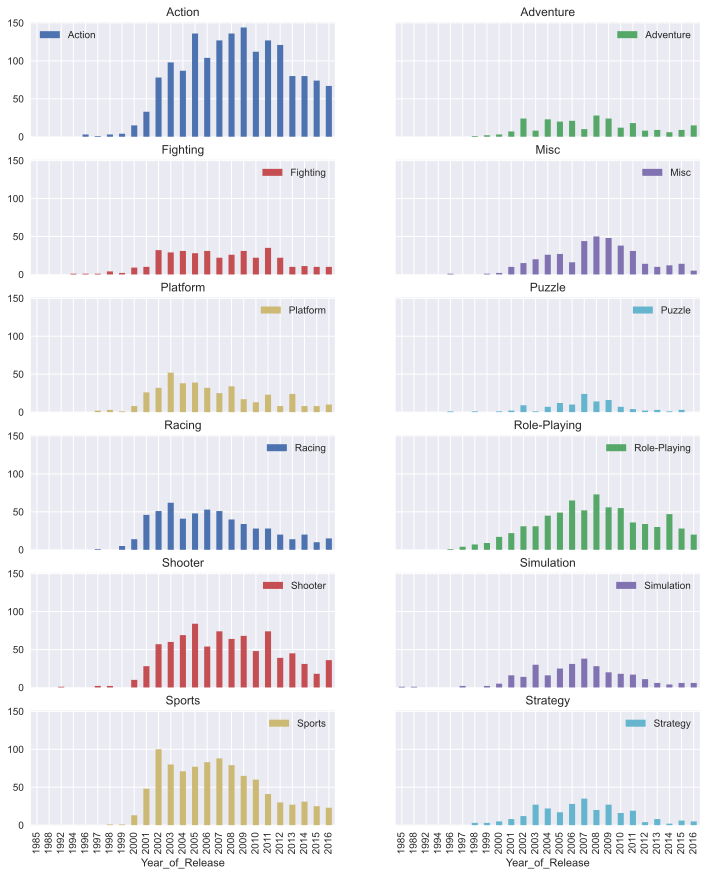

In [7]:
# Число игр, выпущенных в каждый год с разбивкой по жанру
pd.crosstab(df["Year_of_Release"], df["Genre"]).plot.bar(subplots=True, 
                                                         sharex=True,
                                                         sharey=True,
                                                         layout=(12, 2),
                                                         figsize=(12, 30))
plt.show()

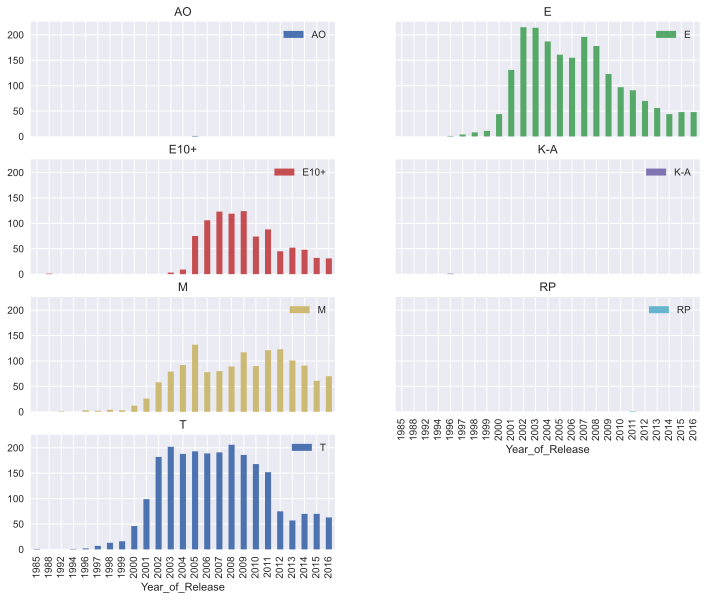

In [8]:
# Число игр, выпущенных в каждый год с разбивкой по рейтингу
pd.crosstab(df["Year_of_Release"], df["Rating"]).plot.bar(subplots=True, 
                                                          sharex=True,
                                                          sharey=True,
                                                          layout=(12, 2),
                                                          figsize=(12, 30))
plt.show()

### Задание 2.   
Провизуализируйте динамику по годам средней оценки критиков в общем и с разбивкой: 
    - по жанру
    - по возрастному рейтингу 


**Tip:** Здесь также пригодится `crosstab`. Обратите внимание на аргументы `values` и `aggfunc`.

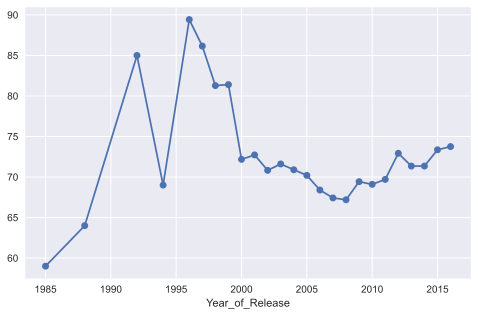

In [9]:
# Динамика по годам средней оценки критиков в общем
df.groupby(["Year_of_Release"]).Critic_Score.mean().plot(marker='o')
plt.show()

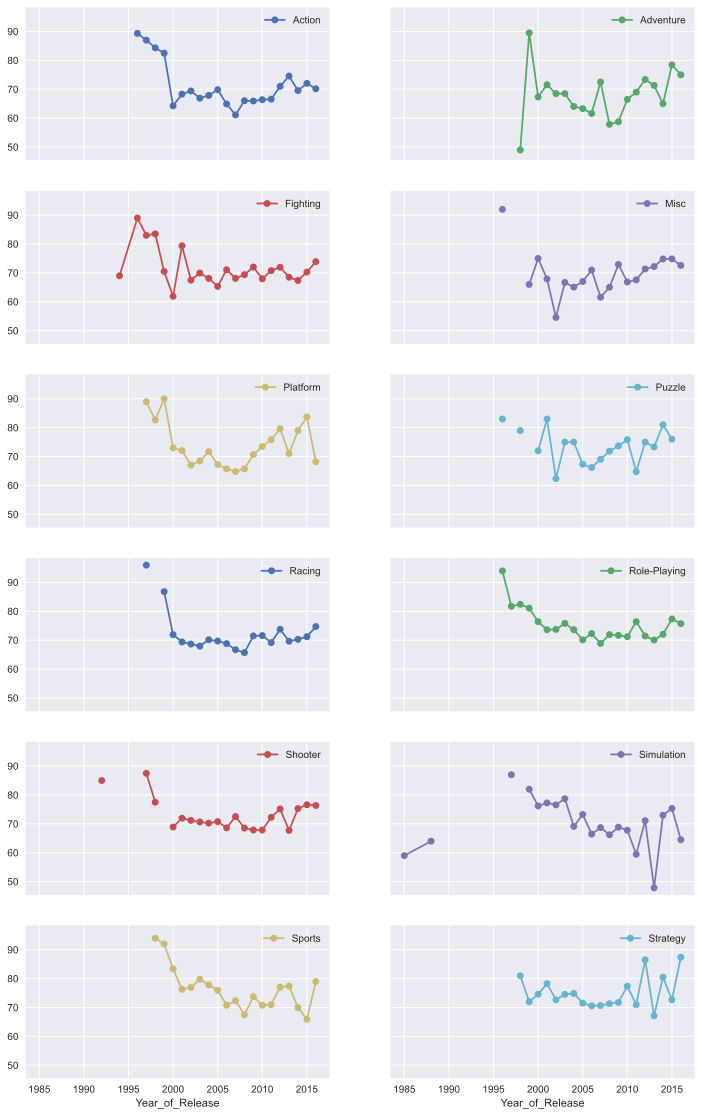

In [10]:
# Динамика по годам средней оценки критиков с разбивкой по жанру
pd.crosstab(df["Year_of_Release"], df["Genre"], df["Critic_Score"], aggfunc="mean").plot(subplots=True, 
                                                                                         sharex=True,
                                                                                         sharey=True,
                                                                                         layout=(12, 2),
                                                                                         figsize=(12, 40),
                                                                                         marker='o')
plt.show()

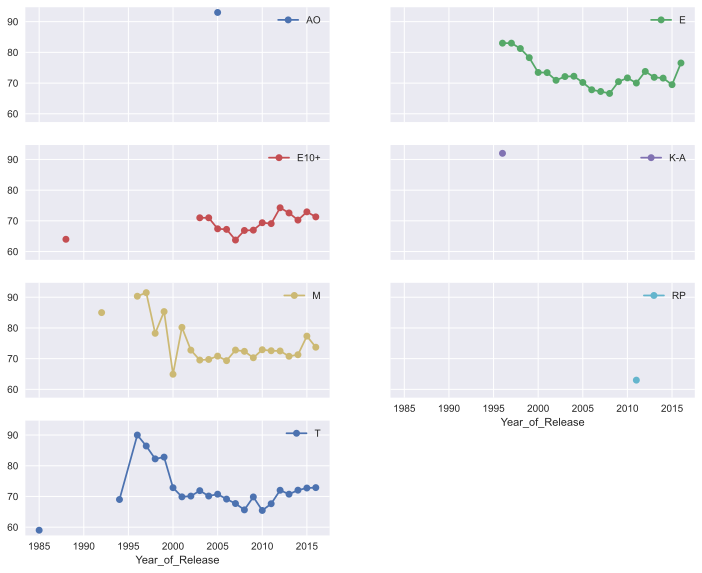

In [11]:
# Динамика по годам средней оценки критиков с разбивкой по рейтингу
pd.crosstab(df["Year_of_Release"], df["Rating"], df["Critic_Score"], aggfunc="mean").plot(subplots=True, 
                                                                                          sharex=True,
                                                                                          sharey=True,
                                                                                          layout=(12, 2),
                                                                                          figsize=(12, 30),
                                                                                          marker='o')
plt.show()

### Задание 3.   
То же самое для средней оценки пользователей 

**Tip:** Не забудьте выполнить приведение типа для признака.

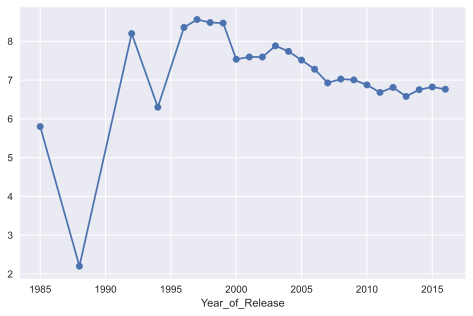

In [12]:
# Динамика по годам средней оценки пользователей в общем
df.groupby(["Year_of_Release"]).User_Score.mean().plot(marker='o')
plt.show()

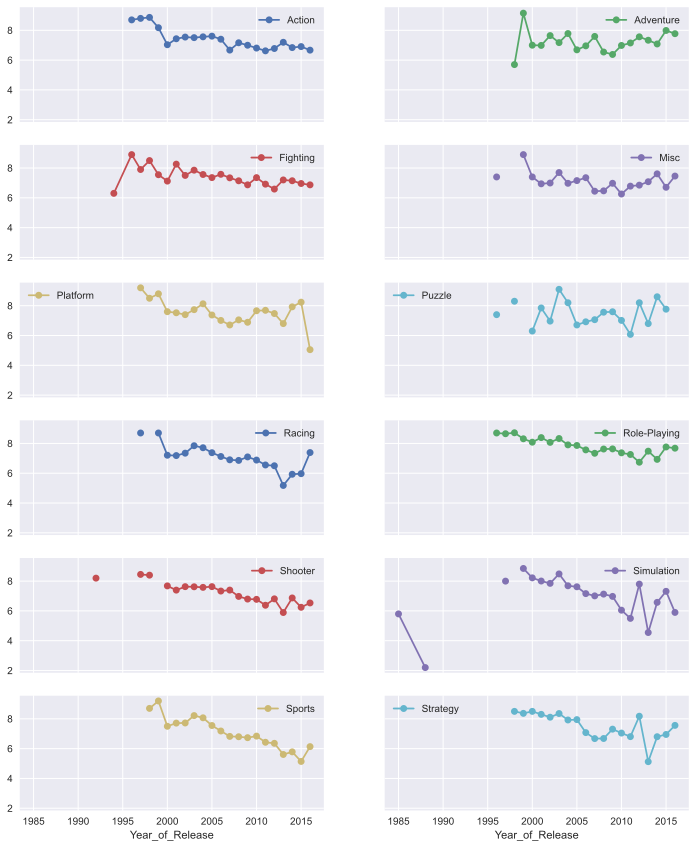

In [13]:
# Динамика по годам средней оценки пользователей с разбивкой по жанру
pd.crosstab(df["Year_of_Release"], df["Genre"], df["User_Score"], aggfunc="mean").plot(subplots=True, 
                                                                                        sharex=True,
                                                                                        sharey=True,
                                                                                        layout=(12, 2),
                                                                                        figsize=(12, 30),
                                                                                        marker='o')
plt.show()

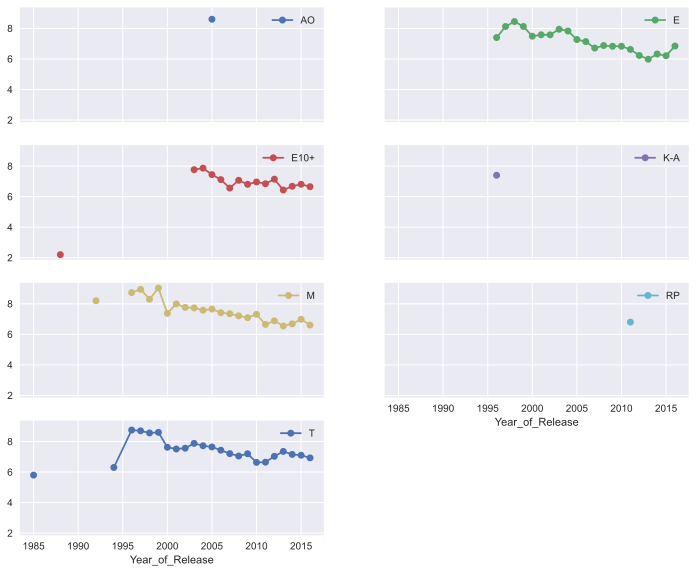

In [14]:
# Динамика по годам средней оценки пользователей с разбивкой по рейтингу
pd.crosstab(df["Year_of_Release"], df["Rating"], df["User_Score"], aggfunc="mean").plot(subplots=True, 
                                                                                        sharex=True,
                                                                                        sharey=True,
                                                                                        layout=(12, 2),
                                                                                        figsize=(12, 30),
                                                                                        marker='o')
plt.show()

### Задание 4.   
Постройте гистрограмму числа пользователей.<br> Также постройте с разбивкой по возрастному рейтингу. Используйте одни и те же интервалы в каждой из гистограмм.  

**Tip:** Диапазон значений может быть очень широким, хотя большинство значений сосредоточены в небольшом интервале. Имеет смысл разбить признак на интервалы и построить гистограммы отдельно для каждого интервала. 

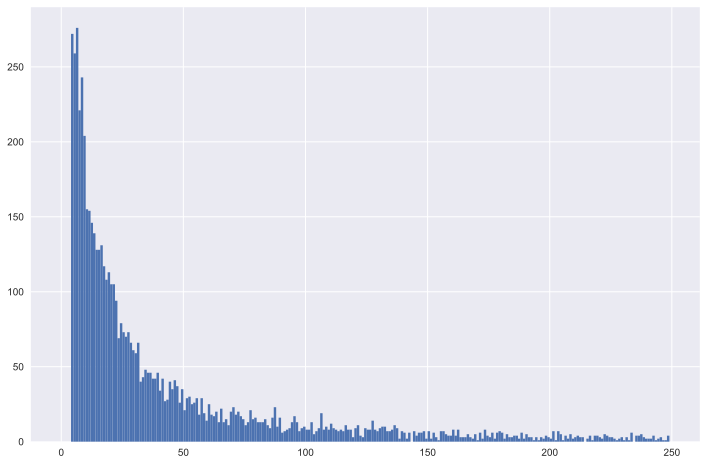

In [15]:
# Гистрограмма числа пользователей в интервале от 0 до 250
df.User_Count.hist(figsize=(12,8), bins=range(250))
plt.show()

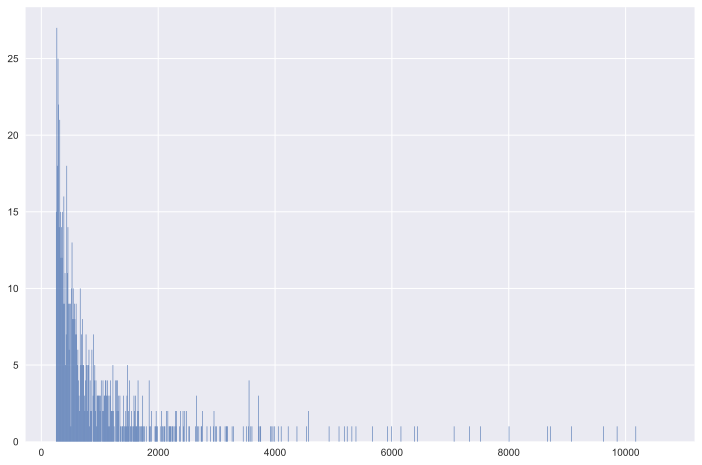

In [16]:
# Гистрограмма числа пользователей в интервале от 250 до MAX
df.User_Count.hist(figsize=(12,8), bins=range(250, df.User_Count.max(), 10))
plt.show()

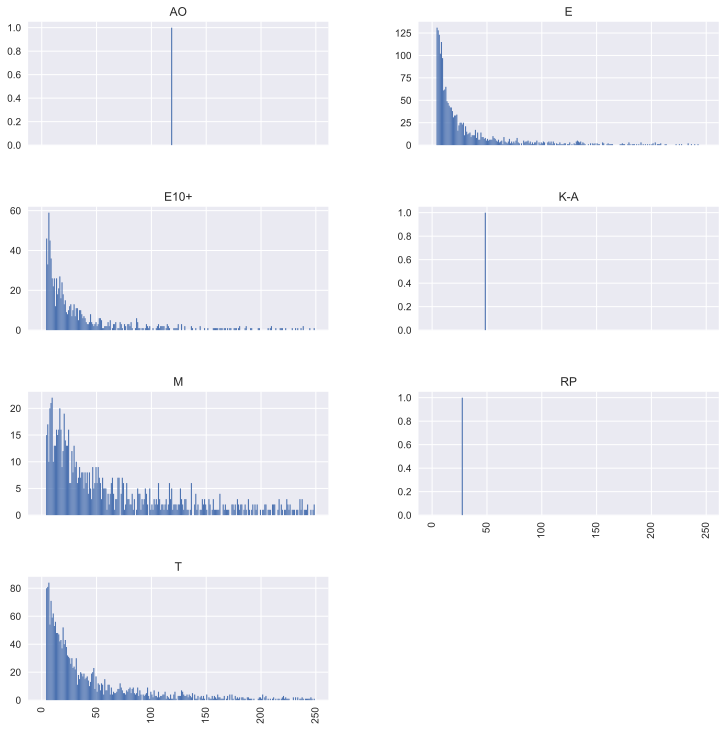

In [17]:
# Гистрограмма числа пользователей в интервале от 0 до 250 с разбивкой по рейтингу
df.User_Count.hist(by=df.Rating, layout=(12, 2), figsize=(12,40), sharex=True, bins=range(250))
plt.show()

### Задание 5.  
С помощью `boxplot` оцените распределение оценок пользователей для 7 самых популярных (больше всего пользователей) издателей (publisher).

Electronic Arts 165773
Activision 117380
Take-Two Interactive 108092
Sony Computer Entertainment 88064
Ubisoft 83988
Nintendo 58039
Namco Bandai Games 55873


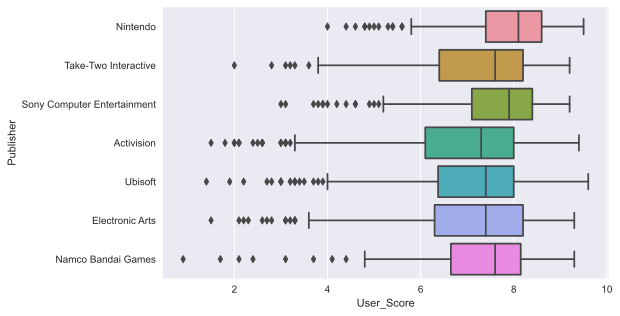

In [18]:
topPublisher = sorted(list(df.Publisher.unique()), key=lambda pub: df[df["Publisher"] == pub].User_Count.sum(), reverse=True)[:7]
for name in topPublisher:
    print(name, df[df["Publisher"] == name].User_Count.sum())

top = df[df["Publisher"].isin(topPublisher)]
sns.boxplot(y="Publisher", x="User_Score", data=top)
plt.show()

## Часть 3. Car Dataset
 

В данном задании предлагается проанализировать набор данных UCI [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/car+evaluation).

In [19]:
car_data = pd.read_csv('data/car.data', header=None)
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Датасет представляет собой характеристики различных автомобилей и их качественную оценку.  
  
Описание данных:  
 - buying - buying price
 - maint - price of the maintenance
 - doors - number of doors
 - persons -  capacity in terms of persons to carry
 - lug_boot - the size of luggage boot
 - safety - estimated safety of the car<br><br>
 - class - class of the car (unacceptable, acceptable, good, very good)  
   
Более подробное описание с источника можно найти в файле `Car_Evaluation_Dataset/car.names.txt`

**Задание: Проанализируйте представленные данные и определите, какие характеристики наиболее сильно влияют на оценку автомобиля? Какие скорее приводят к высокой оценке, какие - к низкой?**

In [20]:
# Проcмотрим уникальные значения для каждого столбца
for column in car_data.columns:
    print(column, car_data[column].unique())
    
# Изменим значения для отображения
#car_data = car_data.replace("5more", 5)
#car_data = car_data.replace("more", 6)

# Преобразование типов
#car_data['doors'] = car_data.doors.astype('int64')
#car_data['persons'] = car_data.persons.astype('int64')


buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
class ['unacc' 'acc' 'vgood' 'good']


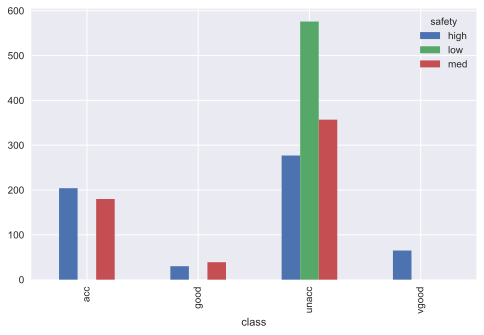

In [24]:
pd.crosstab(car_data["class"], car_data["safety"]).plot.bar()
plt.show()

- Низкая безопасность только у класса Unaccepted
- Класс Very Good имеет только высокую безопасность
---

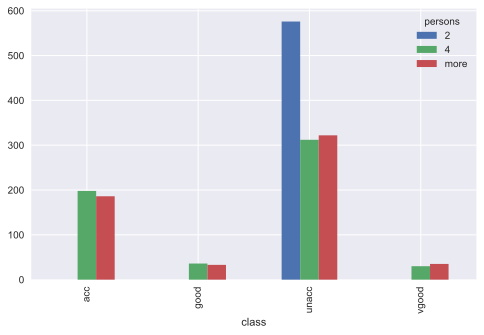

In [27]:
pd.crosstab(car_data["class"], car_data["persons"]).plot.bar()
plt.show()

- Только машины класса Unaccepted имеют вместимость - 2 человека
---

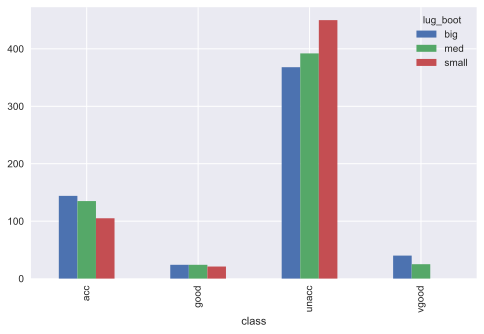

In [28]:
pd.crosstab(car_data["class"], car_data["lug_boot"]).plot.bar()
plt.show()

- Машины класса Very Good не имеют маленького багажника

## Итог: Безопасность наиболее сильно влияет на оценку автомобиля

## Часть 4. Glass Dataset

В данном задании предлагается рассмотреть набор данных UCI [Glass Identification Data Set ](https://archive.ics.uci.edu/ml/datasets/glass+identification).

In [30]:
glass_data = pd.read_csv('data/glass.data', header=None)
glass_data.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Описание с источника:  
  
```
Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
```  
  
Если кратко, то есть 7 видов стекла - последний признак `Type`. Признаки отвечают за различные химические характеристики - например, содержание определенного химического элемента. 

**Задание:  
Ниже представлены 3 объекта, для которых известны значения признаков, но неизвестны типы стекла. Необходимо определить, к какому типу стелка относится каждый из объектов.**  
  
**Tip:** Попробуйте оценить различные статистики, построить боксплоты. 

In [ ]:
#glass_samples = pd.read_csv('Glass_Identification_Dataset/glass.samples.txt', header=None)
#glass_samples.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
#glass_samples

## Часть 5. Titanic Dataset

В данном задании предлагается проанализировать набор данных из популярного соревнования на платформе Kaggle: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).  
  
Данные содержат ряд признаков, описывающих пассажиров Титаника, и информацию о каждом пассажире - выжил он или погиб при крушении лайнера.

<h3>Описание данных<h3>
<h3>Data Dictionary</h3><table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings or spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents or children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
<h3>Variable Notes</h3>
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p></div>

In [171]:
titanic_data = pd.read_csv('data/titanic_train.csv')
titanic_data = titanic_data.drop(columns="Cabin")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


**NB:** В признаке `Cabin` большая часть значений пропущены. Не нужно удалять все наблюдения с пропусками. Достаточно удалить или просто не использовать этот признак.

In [172]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Задания:  
  
  - Проанализируйте данные, оцените распределения признаков относительно друг друга и целевой переменной (`Survived`);<br><br>
  - Восстановите часть или все пропущенные данные в признаке `Age`. Bосстановить нужно не точно, а примерно, с определенными оговорками. Для восстановления нельзя использовать признак `Survived`;<br><br>
  - Предложите способ классификации пассажиров на выживших и погибших (по аналогии с прогнозом оттока клиентов, см. `Explore_analysis.Pandas.html`). Оцените точность предложенного подхода. 

In [173]:
titanic_data['Pclass'] = titanic_data.Pclass.astype('object')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Восстановим пропущенные данные - Age

In [167]:
meanAge = {}
cleanDF = titanic_data.dropna()
for column in ["Sex", "Pclass", "Embarked"]:
    mean = {}
    for value in cleanDF[column].unique():
        meanValue = cleanDF[cleanDF[column] == value].Age.mean()
        mean.update({value: meanValue})
    meanAge.update({column : mean})  
    
for indent in list(titanic_data[titanic_data["Age"].isna()].PassengerId):
    meanAgeSex = meanAge["Sex"][titanic_data[titanic_data["PassengerId"] == indent].Sex.unique()[0]]
    meanAgePclass = meanAge["Pclass"][titanic_data[titanic_data["PassengerId"] == indent].Pclass.unique()[0]]
    meanAgeEmbarked = meanAge["Embarked"][titanic_data[titanic_data["PassengerId"] == indent].Embarked.unique()[0]]
    titanic_data.at[indent - 1, "Age"] = (meanAgeSex + meanAgePclass + meanAgeEmbarked) / 3

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Проанализируем

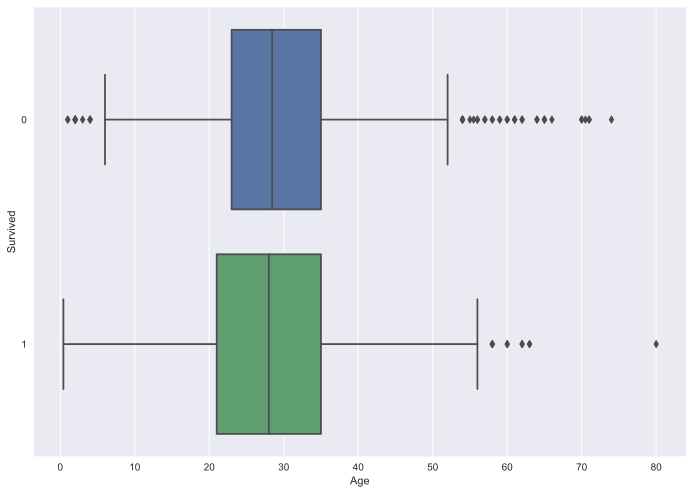

In [170]:
plt.figure(figsize=(11.7, 8.27))
sns.boxplot(y="Survived", x="Age", data=titanic_data, orient="h")
plt.show()

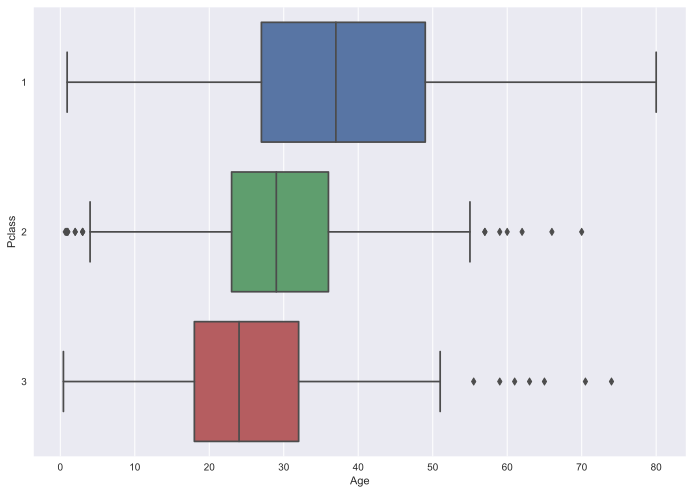

In [175]:
plt.figure(figsize=(11.7, 8.27))
sns.boxplot(y="Pclass", x="Age", data=titanic_data, orient="h")
plt.show()

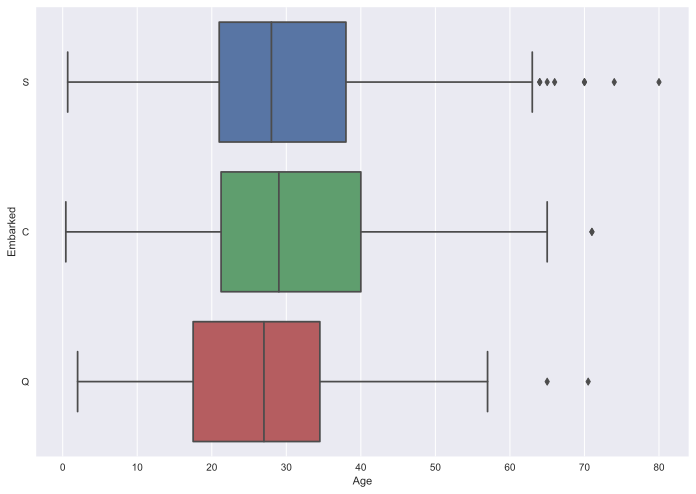

In [176]:
plt.figure(figsize=(11.7, 8.27))
sns.boxplot(y="Embarked", x="Age", data=titanic_data, orient="h")
plt.show()

## Классифицируем

xD